In [ ]:
# Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c . Training the model
# d. Estimating the model’s performance

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD


2024-11-04 21:15:16.919617: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 21:15:16.959041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 21:15:16.959681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 21:15:17.666804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



# a. Loading and preprocessing the image data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Data type of x_train=",x_train.dtype)

x_train=x_train.astype('float32') / 255
x_test=x_test.astype('float32') / 255

print("Data type of x_train after converting into vector=",x_train.dtype)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



Data type of x_train= uint8
Data type of x_train after converting into vector= float32


In [4]:
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

In [5]:
#normalizing the RGB code by dividing the max RGB value



print("shape of training data",x_train.shape)
print("shape of testing data",x_test.shape)
x_train[0].min(),x_train[0].max()

shape of training data (60000, 28, 28, 1)
shape of testing data (10000, 28, 28, 1)


(0.0, 1.0)

# B.Define the model architecture

In [6]:

model = Sequential([
    layers.Conv2D(32,(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

# C.Training the Model

In [7]:
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train,  validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1979 - accuracy: 0.9379 - val_loss: 0.0567 - val_accuracy: 0.9813
Epoch 2/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0389 - val_accuracy: 0.9861
Epoch 3/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0361 - val_accuracy: 0.9882


# D Estimating the Model’s Performance

313/313 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9882
Test loss: 0.036095909774303436
Test accuracy: 0.9882000088691711


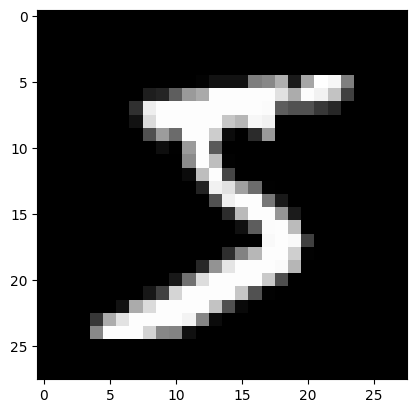

1/1 [==============================] - 0s 68ms/step
pridicted class= 5


In [9]:
# Evaluate the model
score= model.evaluate(x_test, y_test)
print(f'Test loss:',score[0])
print(f'Test accuracy:',score[1])

#showing the image position from the dataset
image=x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

# Predicting the image value
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])  # Reshape for model input
predicted_class=model.predict(image)
print("pridicted class=" ,np.argmax(pridicted_class))





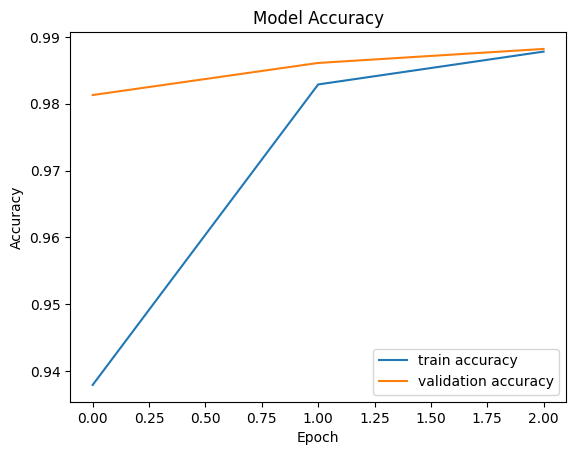

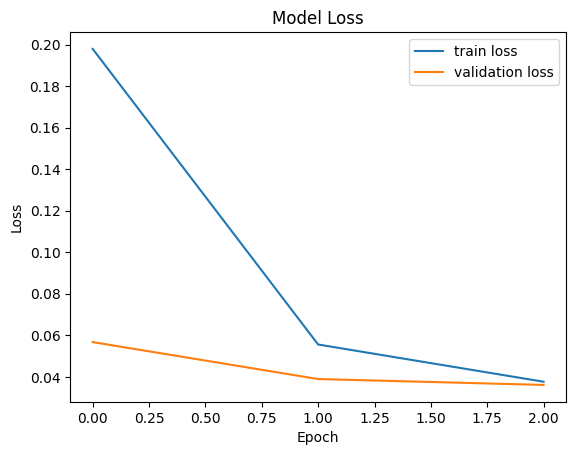

In [10]:
# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()